In [28]:
import requests
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

from io import StringIO

In [134]:
# USDA NASS QuickStats API endpoint
url = "https://quickstats.nass.usda.gov/api/api_GET/?key=1BB81748-F4B2-3127-A775-520D06268693"

# Define parameters for the API request
params = {
    # "source_desc": "SURVEY",
    # "sector_desc": "CROPS",
    # "group_desc": "FIELD CROPS",
    "commodity_desc": "CORN",
    "state_name": "IOWA",
    "year__GE": "2021",
    "year__LE": "2021",
    "agg_level_desc": "COUNTY",
    # "statisticcat_desc": "YIELD",
    "unit_desc": "BU",
    "format": "CSV",
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.text
    df = pd.read_csv(
        StringIO(data),
    )
    # Process the data as per your requirements
else:
    print("Error occurred while fetching data:", response.status_code)
    print(response.content)

df.to_csv("../data/usda.csv", index=False)


In [118]:
df.columns

Index(['source_desc', 'sector_desc', 'group_desc', 'commodity_desc',
       'class_desc', 'prodn_practice_desc', 'util_practice_desc',
       'statisticcat_desc', 'unit_desc', 'short_desc', 'domain_desc',
       'domaincat_desc', 'agg_level_desc', 'state_ansi', 'state_fips_code',
       'state_alpha', 'state_name', 'asd_code', 'asd_desc', 'county_ansi',
       'county_code', 'county_name', 'region_desc', 'zip_5', 'watershed_code',
       'watershed_desc', 'congr_district_code', 'country_code', 'country_name',
       'location_desc', 'year', 'freq_desc', 'begin_code', 'end_code',
       'reference_period_desc', 'week_ending', 'load_time', 'Value', 'CV (%)'],
      dtype='object')

In [145]:
counties = gpd.read_file("../data/cb/cb_2022_us_county_500k.shp")
counties[['STATEFP', 'COUNTYFP']] = counties[['STATEFP', 'COUNTYFP']].apply(pd.to_numeric)

iowa_counties = counties[counties.STATEFP == 19]
iowa_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
32,19,177,00465277,0500000US19177,19177,Van Buren,Van Buren County,IA,Iowa,06,1255605676,14880499,"POLYGON ((-92.17978 40.60878, -92.17963 40.609..."
33,19,45,00465211,0500000US19045,19045,Clinton,Clinton County,IA,Iowa,06,1799934695,39410955,"POLYGON ((-90.89894 41.91853, -90.89807 41.920..."
34,19,163,00465270,0500000US19163,19163,Scott,Scott County,IA,Iowa,06,1186463532,26196368,"POLYGON ((-90.89980 41.59860, -90.89976 41.600..."
178,19,39,00465209,0500000US19039,19039,Clarke,Clarke County,IA,Iowa,06,1116573604,1524746,"POLYGON ((-94.01489 40.99799, -94.01465 40.999..."
179,19,1,00465190,0500000US19001,19001,Adair,Adair County,IA,Iowa,06,1474404201,2597996,"POLYGON ((-94.70057 41.48250, -94.70053 41.489..."


In [147]:
df = df[df.year == 2021]

In [150]:
df.shape

(85, 39)

In [159]:
merged_data = iowa_counties.merge(df, left_on="COUNTYFP", right_on="county_code")

merged_data["Value"] = merged_data["Value"].str.replace(",", "").astype(float)


(-96.963549, -89.815133, 40.21938215, 43.65747285)

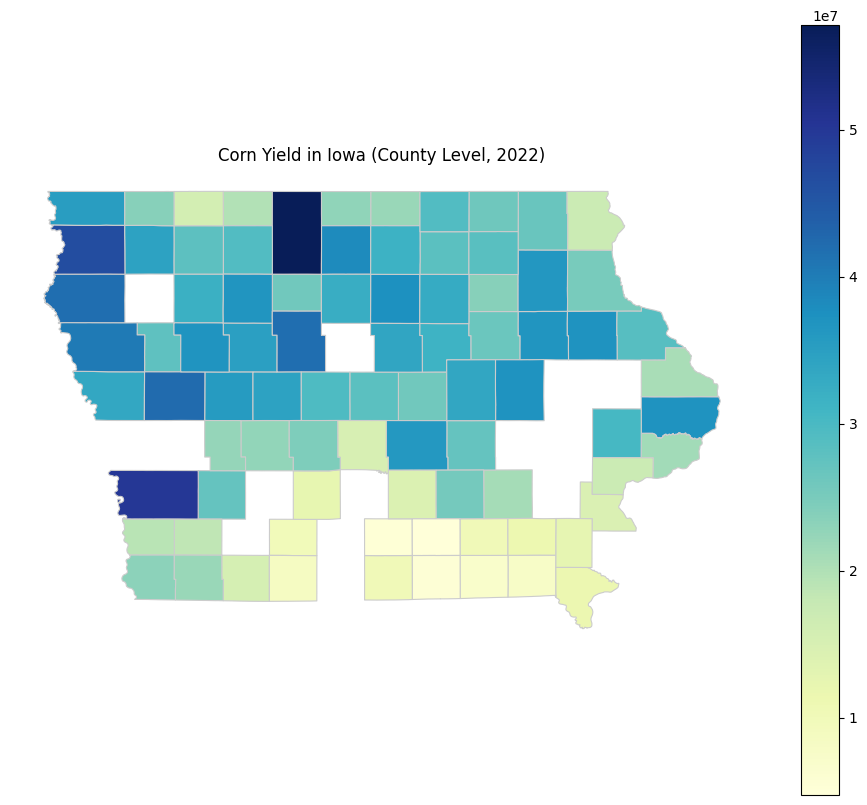

In [162]:
fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column="Value", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Corn Yield in Iowa (County Level, 2022)")
ax.axis("off")